> 회귀분석 느낌으로

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 회귀모형 (1)

In [3]:
x = np.linspace(-10,10,1000)
x0 = x*0+1
x1 = x 
beta0 = 3 
beta1 = 2
y = x0*beta0+x1*beta1+np.random.randn(1000)

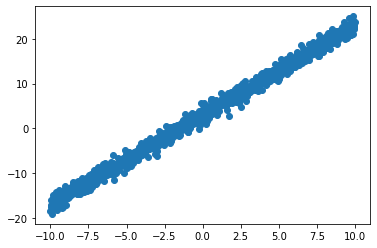

In [4]:
plt.plot(x,y,'o')

# 회귀모형 (2)

$$f_i = 2\times \sin(2\pi t_i) + 1 \times \sin(4\pi t_i) + 3\times\sin(6\pi t_i)+\epsilon_i, \quad t_i = \frac{i}{1000}$$

회귀분석 느낌의 표현은 아래와 같다.

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2x_{i2} + \beta_3x_{i3} + \epsilon_i$$

여기서 $x_{i1} = \sin{2\pi t_i}$ 이고, $x_{i2} = \sin(4\pi t_i), \quad x_{i3} = \sin(6\pi t_i)$.

`-` 관측한자료 

In [5]:
N=1000
x=np.linspace(0,1,N)
eps = np.random.randn(N)
X0 = np.sin(x*0*np.pi)
X1 = np.sin(x*2*np.pi)
X2 = np.sin(x*4*np.pi)
X3 = np.sin(x*6*np.pi)

y_true = 2*X1+1*X2+3*X3
y= y_true + eps

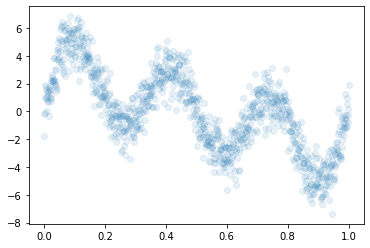

In [6]:
plt.plot(x,y,'o',alpha=0.1)
# plt.plot(x,y_true)

- observed signal

`-` 위의 자료를 해석하는 방법 

In [7]:
def spec(y):
    N= len(y)
    return abs(np.fft.fft(y)/N)*2 

- real symmetric frequency

In [8]:
y=2*X1+1*X2+3*X3+eps
yfft =spec(y) 
y1=2*X1
y2=1*X2
y3=3*X3
yfft1=spec(y1)
yfft2=spec(y2)
yfft3=spec(y3)
epsfft=spec(eps)

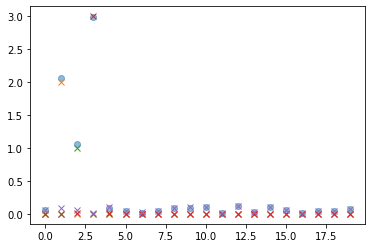

In [9]:
plt.plot(yfft[:20],'o',alpha=0.5)
plt.plot(yfft1[:20],'x',alpha=1,)
plt.plot(yfft2[:20],'x',alpha=1)
plt.plot(yfft3[:20],'x',alpha=1)
plt.plot(epsfft[:20],'x',alpha=1)

`-` 퓨리에변환 -> threshold -> 역퓨리에변환을 이용한 스킬 

In [10]:
yfft=np.fft.fft(y)

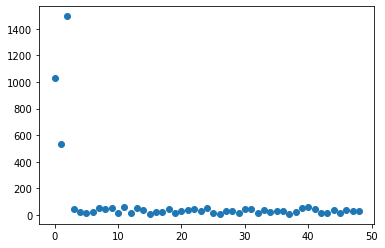

In [11]:
plt.plot(abs(yfft[1:50]),'o')

In [12]:
yfft[abs(yfft)<100] = 0

/home/jy/anaconda3/envs/torch/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


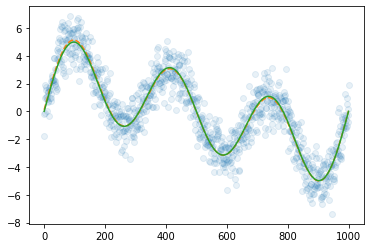

In [13]:
plt.plot(y,'o',alpha=0.1)
yhat=np.fft.ifft(yfft)
plt.plot(yhat,'--')
plt.plot(y-eps,'-')

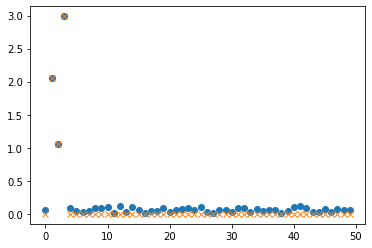

In [14]:
plt.plot(spec(y)[:50],'o')
plt.plot(spec(yhat)[:50],'x')

### `-` <font color='green'>Fast Fourier Transfors (FFT)</font>

$$X(k) = \frac{1}{N}\sum_{n=0}^{N-1} x(n) \cdot e^{-j \frac{2\pi}{N}kn}$$

`-` `np.fft.fft()` 함수 이용

In [15]:
np.fft.fft(y)[:10]

array([ 28.92715005   +0.j        ,  34.05878195-1028.97157083j,
        17.69086431 -530.11724055j,   7.37432739-1494.50531202j,
        29.03159355  -33.71928164j,  20.2513632    -3.83449785j,
         4.98960501   -9.5019045j , -18.28763105   +8.27271731j,
       -43.73889873  +19.33055512j,  32.90966965  -34.52773359j])

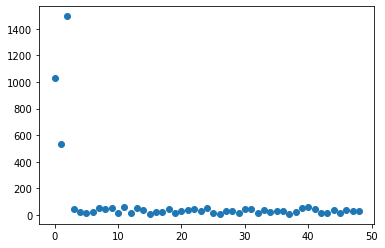

In [23]:
plt.plot(abs(np.fft.fft(y))[1:50], 'o')

`-` 직접 구현

In [27]:
N = len(y)
fft_y_ = 0
for i in range(N):
    fft_y_ += y[i]*np.exp(-2j*np.pi/N*np.arange(N))

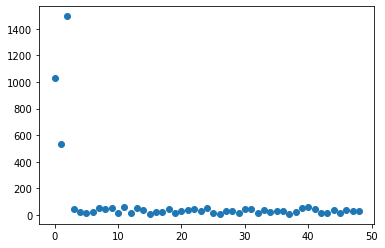

In [28]:
plt.plot(abs(np.fft.fft(y))[1:50],'o')

`-` 비교

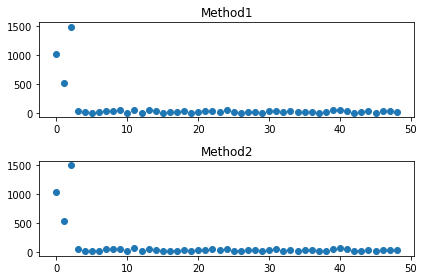

In [40]:
fig, axes = plt.subplots(2,1)
axes[0].plot(abs(np.fft.fft(y))[1:50], 'o')
axes[0].set_title('Method1')
axes[1].plot(abs(np.fft.fft(y))[1:50],'o')
axes[1].set_title('Method2')
plt.tight_layout()

---

# 삼성전자 주가자료를 스무딩해보기 

`-` 삼성전자 자료

In [29]:
import yfinance as yf

In [30]:
start_date = "2023-01-01"
end_date = "2023-05-02"
y = yf.download("005930.KS", start=start_date, end=end_date)['Adj Close'].to_numpy()

[*********************100%***********************]  1 of 1 completed


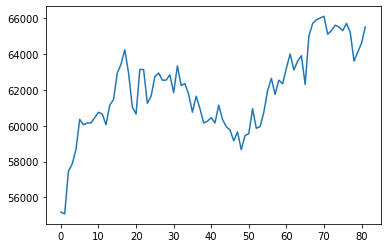

In [33]:
plt.plot(y)

`-` 스펙트럼

In [34]:
yfft = np.fft.fft(y)

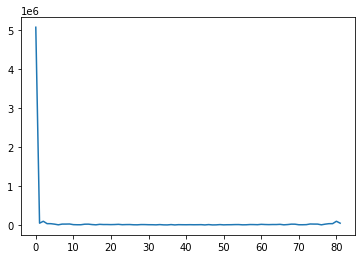

In [37]:
plt.plot(abs(yfft))

`-` 처음 50개정도만 관찰 

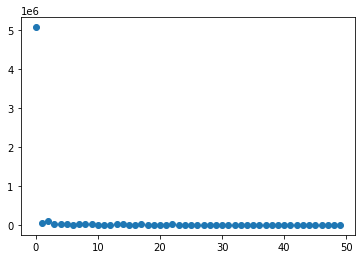

In [38]:
plt.plot(abs(yfft[:50]),'o')

- 첫값이 너무커서 나머지는 잘안보임 

`-` 2번째부터 50번째까지만 관찰 

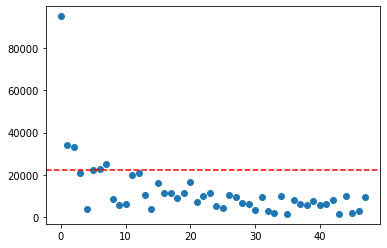

In [40]:
plt.plot(abs(yfft)[2:50],'o')
plt.axhline(y=22500, color='r', linestyle='--')

- 대충 이정도 짜르면 될것같음 

`-` thresholded value

In [41]:
tresh_value = 22500

In [42]:
yfft[abs(yfft)<tresh_value] =0 

`-` 퓨리에역변환

In [43]:
yhat = np.fft.ifft(yfft)
yhat[:5]

array([59664.72193044+8.87311904e-14j, 58572.98839934+8.87311904e-14j,
       58066.07369126+3.39894326e-14j, 58169.18671667-6.87747670e-14j,
       58706.41986821-1.14383435e-13j])

실수화

In [44]:
yhat = np.real(yhat)
yhat[:5]

array([59664.72193044, 58572.98839934, 58066.07369126, 58169.18671667,
       58706.41986821])

`-` 적합결과 시각화 

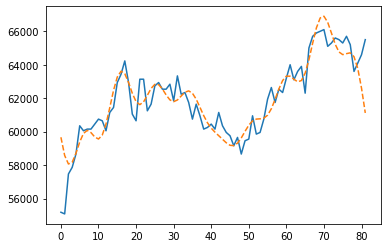

In [45]:
plt.plot(y)
plt.plot(yhat,'--')

### `-` 숙제: treshold value를 관찰하며 시각화해볼것 

In [96]:
# 스펙트럼
yfft1 = yfft.copy()
yfft2 = yfft.copy()
yfft3 = yfft.copy()

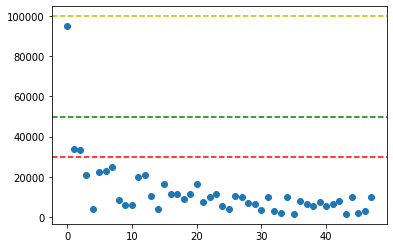

In [97]:
plt.plot(abs(yfft)[2:50],'o')
plt.axhline(y=30000, color='r', linestyle='--')
plt.axhline(y=50000, color='g', linestyle='--')
plt.axhline(y=100000, color='y', linestyle='--')
plt.show()

`-` thresholded value

In [98]:
tresh_value1 = 30000
tresh_value2 = 50000
tresh_value3 = 100000

In [99]:
yfft1[abs(yfft)<tresh_value1] =0 
yfft2[abs(yfft)<tresh_value2] =0 
yfft3[abs(yfft)<tresh_value3] =0 

`-` 퓨리에역변환

In [101]:
yhat1 = np.real(np.fft.ifft(yfft1))
yhat2 = np.real(np.fft.ifft(yfft2))
yhat3 = np.real(np.fft.ifft(yfft3))
yhat1[:5], yhat2[:5], yhat3[:5] 

(array([60302.63175219, 59674.04944237, 59176.52517726, 58830.97854078,
        58648.54453033]),
 array([60610.76706766, 60334.04540323, 60094.64069051, 59898.16437304,
        59749.22168918]),
 array([61926.12309451, 61926.12309451, 61926.12309451, 61926.12309451,
        61926.12309451]))

`-` 적합결과 시각화 

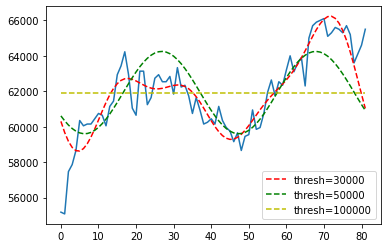

In [108]:
plt.plot(y)
plt.plot(yhat1, color='r', linestyle='--', label='thresh=30000')
plt.plot(yhat2,color='g', linestyle='--', label='thresh=50000')
plt.plot(yhat3, color='y', linestyle='--', label='thresh=100000')
plt.legend()
plt.show()

- threshold 값이 커질수록 스무딩 되는 느낌
- $\text{thresh}=100,000$ $\to$ underfitting
- $\text{thresh}=30,000$ 으로 잡았을 때 원자료와 비슷

# minor topics 

`-` y의 FFT 결과는 항상 y와 같은길이임 

In [109]:
len(y)

82

In [110]:
len(np.fft.fft(y))

82

`-` 에일리어싱: number of observation은 얼마나 세밀한 주파수까지 측정가능하냐를 결정함 

**예시1**: 에일리어싱 

In [137]:
x = np.linspace(-3.14,3.14,10)

In [138]:
x1 = np.sin(8*x)
x2 = np.sin(10*x)

In [139]:
np.corrcoef([x1,x2])

array([[ 1.        , -0.99975131],
       [-0.99975131,  1.        ]])

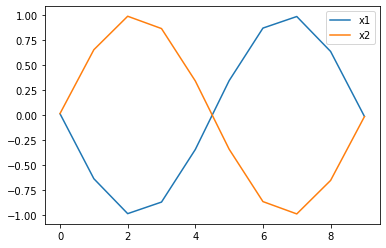

In [140]:
plt.plot(x1,label='x1')
plt.plot(x2,label='x2')
plt.legend()

- 실제로는 x2가 더 고주파인데, 같은 주파수처럼 보임

**예시2**: 에일리어싱이 없는 경우 

In [126]:
x = np.linspace(-3.14,3.14,100000)

In [127]:
x1 = np.sin(8*x)
x2 = np.sin(10*x)

In [560]:
np.corrcoef([x1,x2])

array([[ 1.00000000e+00, -6.45767105e-08],
       [-6.45767105e-08,  1.00000000e+00]])

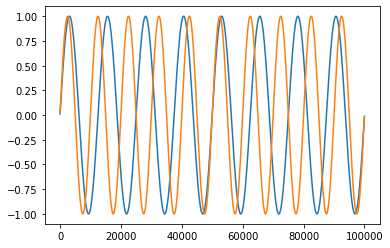

In [132]:
plt.plot(x1)
plt.plot(x2)

- 주파수 왜곡떄문에 실제로는 corr ceof = 0 일지라도 관측되는건 corr coef >0 일 수 있음 

---

- 에일리어싱: <https://moonnote.tistory.com/133>
- 나이퀴스트 이론: <https://ralasun.github.io/signal%20analysis/2021/07/01/nyq/>
- kernel : <https://sonsnotation.blogspot.com/2020/11/11-1-kernel.html>
- FFT: <https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a>